# Modelo estatístico de previsão de chuva

**Grupo:**
> Breno Marti

> Diogo Cintra

> João Pedro Chacon Ruiz

> Luiz Felipe Valente

In [31]:
#Importando as bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np
from pandas import DataFrame
from scipy.stats import probplot
import statsmodels.api as sm

In [32]:
def Grafico2Eixos(listax, labelx,  listay1, labely1, listay2, labely2):
    # Vamos agora plotar os resultados como foi pedido: dois eixos
    # Definicao dos objetos figura e eixo       
    fig, ax1 = plt.subplots()
    fig.set_size_inches(10, 5) 
    # plota a lista 1
    ax1.plot(listax, listay1, 'b')
    # dá nome ao eixo x
    ax1.set_xlabel(labelx)
    # dá nome ao eixo y1
    ax1.set_ylabel(labely1, color='b')
    # seta os limites dos eixos x e y
    # faz a cor das marcas no eixo y1 iguais a linha
    for tl in ax1.get_yticklabels():
        tl.set_color('b')    
    # Cria um eixo com valor de y independente, mas com o mesmo x
    ax2 = ax1.twinx()
    # plota a lista 2
    ax2.plot(listax, listay2, 'g')
    # dá nome ao eixo y2
    ax2.set_ylabel(labely2, color='g')
    # seta os limites dos eixos x e y
    #ax2.axis([0,2, 0, max(S)+.5])
    # faz a cor das marcas no eixo iguais a linha
    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    plt.grid(True)
    plt.show()   

In [33]:
dados1 = pd.read_excel('previsao_chuva.xlsx')
dados1.head()

,codigo_estacao,data,hora,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_direcao,vento_vel,vento_rajada,radiacao,precipitacao
0,A401,2018-11-06,8,24.6,25.0,24.6,78,78.0,76.0,20.6,20.6,20.4,1006.7,1006.7,1006.2,0.8,64.0,5.2,NaN,0.0
1,A401,2018-11-06,16,29.9,31.1,29.8,56,62.0,55.0,20.2,22.1,20.2,1006.9,1007.6,1006.9,1.8,157.0,6.2,3389.0,0.0
2,A401,2018-11-06,4,24.7,25.2,24.7,77,80.0,75.0,20.4,21.3,20.2,1006.7,1007.1,1006.7,0.9,58.0,5.2,NaN,0.0
3,A401,2018-11-06,11,27.3,27.6,26.7,66,72.0,65.0,20.5,21.3,20.3,1008.9,1008.9,1008.1,1.9,65.0,5.7,1375.0,0.0
4,A401,2018-11-06,2,25.1,25.4,25.0,78,78.0,76.0,21.0,21.1,20.8,1007.6,1008.1,1007.6,1.2,90.0,5.0,NaN,0.0


In [34]:
datas = dados1.data
horas = dados1.hora

In [35]:
concat = []
for e in range(len(datas)):
    #concat.append(datas[e] + ',' + horas[e])
    d = datas[e]
    d = d.replace(hour=horas[e], minute=0, second=0)
    concat.append(d)
    
#print(concat)
dia_hora = pd.DataFrame(concat)

In [36]:
dados1.insert(0,'time', dia_hora, True)

In [37]:
dados_2 = dados1.drop(['data', 'hora'], axis=1)
dados_3 = dados_2.set_index("time")

dados2 = dados1.drop(['data', 'hora'], axis=1)
dados2.head()

,time,codigo_estacao,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_direcao,vento_vel,vento_rajada,radiacao,precipitacao
0,2018-11-06 08:00:00,A401,24.6,25.0,24.6,78,78.0,76.0,20.6,20.6,20.4,1006.7,1006.7,1006.2,0.8,64.0,5.2,NaN,0.0
1,2018-11-06 16:00:00,A401,29.9,31.1,29.8,56,62.0,55.0,20.2,22.1,20.2,1006.9,1007.6,1006.9,1.8,157.0,6.2,3389.0,0.0
2,2018-11-06 04:00:00,A401,24.7,25.2,24.7,77,80.0,75.0,20.4,21.3,20.2,1006.7,1007.1,1006.7,0.9,58.0,5.2,NaN,0.0
3,2018-11-06 11:00:00,A401,27.3,27.6,26.7,66,72.0,65.0,20.5,21.3,20.3,1008.9,1008.9,1008.1,1.9,65.0,5.7,1375.0,0.0
4,2018-11-06 02:00:00,A401,25.1,25.4,25.0,78,78.0,76.0,21.0,21.1,20.8,1007.6,1008.1,1007.6,1.2,90.0,5.0,NaN,0.0


___
#### Definindo as variáveis que vamos estudar 

In [38]:
dados_log = np.log(dados_3[['temp_inst','pressao','umid_inst','precipitacao','vento_vel']])

dados3 = dados2.transpose()
dados4 = dados3.loc[['time','temp_inst', 'pressao','umid_inst', 'precipitacao','vento_vel']]
dados5 = dados4.transpose()
dados5 = dados5.sort_values(by='time')
dados5 = dados5.reset_index()
del dados5['index']

E:\Programas\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [39]:
data = []
hora = []

for coisas in dados5.time.astype(str):
    teste = coisas.split()
    data.append(teste[0])
    horas = teste[1]
    hora.append(horas[0:2])
    


In [40]:
final = []

anterior = data[0]
a=0
day = 0
for dia in data:
    if a < 8744:
        if data[a+1] == anterior:
            final.append(day)
        else:
            final.append(day)
            day += 1
            anterior = data[a+1]
    a += 1

In [41]:
dados5.set_index('time')
hora = pd.Series(hora).astype(int) 
final = pd.Series(final).astype(int)

,temp_inst,pressao,umid_inst,precipitacao,vento_vel
time,,,,,
2018-11-06 00:00:00,25.3,1008.1,76,0,74
2018-11-06 01:00:00,25.2,1008.1,78,0,69
2018-11-06 02:00:00,25.1,1007.6,78,0,90
2018-11-06 03:00:00,25.2,1007.1,79,0,95
2018-11-06 04:00:00,24.7,1006.7,77,0,58
2018-11-06 05:00:00,25.4,1006.2,76,0,67
2018-11-06 06:00:00,25.3,1005.7,76,0,73
2018-11-06 07:00:00,24.9,1006.3,76,0,77
2018-11-06 08:00:00,24.6,1006.7,78,0,64


In [42]:
dados5['horas'] = hora
dados5['dias'] = final

In [43]:
dados5['hora seno'] = np.sin(2*np.pi*hora/24)
dados5['hora cosseno'] = np.cos(2*np.pi*hora/24)

In [44]:
dados5['dia seno'] = np.sin(2*np.pi*final/365.25)
dados5['dia cosseno'] = np.cos(2*np.pi*final/365.25)
dados5

,time,temp_inst,pressao,umid_inst,precipitacao,vento_vel,horas,dias,hora seno,hora cosseno,dia seno,dia cosseno
0,2018-11-06 00:00:00,25.3,1008.1,76,0,74,0,0.0,0.000000e+00,1.000000e+00,0.000000,1.000000
1,2018-11-06 01:00:00,25.2,1008.1,78,0,69,1,0.0,2.588190e-01,9.659258e-01,0.000000,1.000000
2,2018-11-06 02:00:00,25.1,1007.6,78,0,90,2,0.0,5.000000e-01,8.660254e-01,0.000000,1.000000
3,2018-11-06 03:00:00,25.2,1007.1,79,0,95,3,0.0,7.071068e-01,7.071068e-01,0.000000,1.000000
4,2018-11-06 04:00:00,24.7,1006.7,77,0,58,4,0.0,8.660254e-01,5.000000e-01,0.000000,1.000000
5,2018-11-06 05:00:00,25.4,1006.2,76,0,67,5,0.0,9.659258e-01,2.588190e-01,0.000000,1.000000
6,2018-11-06 06:00:00,25.3,1005.7,76,0,73,6,0.0,1.000000e+00,6.123234e-17,0.000000,1.000000
7,2018-11-06 07:00:00,24.9,1006.3,76,0,77,7,0.0,9.659258e-01,-2.588190e-01,0.000000,1.000000
8,2018-11-06 08:00:00,24.6,1006.7,78,0,64,8,0.0,8.660254e-01,-5.000000e-01,0.000000,1.000000
9,2018-11-06 09:00:00,25.6,1007.3,75,0,64,9,0.0,7.071068e-01,-7.071068e-01,0.000000,1.000000


In [45]:
dados6 = dados5.set_index('time')
t = [] #hora de chuva
t1 = [] #uma hora anterior
t2 = [] #duas horas anteriores
t3 = [] #tres horas anteriores
t4 = [] #quatro horas anteriores

for e in range(len(dados6)):
    
    if dados6['precipitacao'][e]>0:
        t.append(dados6.iloc[e])
        t1.append(dados6.iloc[e-1])
        t2.append(dados6.iloc[e-2])
        t3.append(dados6.iloc[e-3])
        t4.append(dados6.iloc[e-4])
        
T = pd.DataFrame(t)
T1 = pd.DataFrame(t1)
T2 = pd.DataFrame(t2)
T3 = pd.DataFrame(t3)
T4 = pd.DataFrame(t4)

T.rename(columns={'temp_inst':'temperatura_t'}, inplace=True)
T.rename(columns={'pressao':'pressao_t'}, inplace=True)
T.rename(columns={'umid_inst':'umidade_t'}, inplace=True)
T.rename(columns={'precipitacao':'precipitacao_t'}, inplace=True)
T.rename(columns={'vento_vel':'vento_t'}, inplace=True)
T[['temperatura_t', 'pressao_t', 'umidade_t','precipitacao_t','vento_t']].astype(float)

T1.rename(columns={'temp_inst':'temperatura_t1'}, inplace=True)
T1.rename(columns={'pressao':'pressao_t1'}, inplace=True)
T1.rename(columns={'umid_inst':'umidade_t1'}, inplace=True)
T1.rename(columns={'precipitacao':'precipitacao_t1'}, inplace=True)
T1.rename(columns={'vento_vel':'vento_t1'}, inplace=True)
T1[['temperatura_t1', 'pressao_t1', 'umidade_t1','precipitacao_t1','vento_t1']].astype(float)

T2.rename(columns={'temp_inst':'temperatura_t2'}, inplace=True)
T2.rename(columns={'pressao':'pressao_t2'}, inplace=True)
T2.rename(columns={'umid_inst':'umidade_t2'}, inplace=True)
T2.rename(columns={'precipitacao':'precipitacao_t2'}, inplace=True)
T2.rename(columns={'vento_vel':'vento_t2'}, inplace=True)
T2[['temperatura_t2', 'pressao_t2', 'umidade_t2','precipitacao_t2','vento_t2']].astype(float)

T3.rename(columns={'temp_inst':'temperatura_t3'}, inplace=True)
T3.rename(columns={'pressao':'pressao_t3'}, inplace=True)
T3.rename(columns={'umid_inst':'umidade_t3'}, inplace=True)
T3.rename(columns={'precipitacao':'precipitacao_t3'}, inplace=True)
T3.rename(columns={'vento_vel':'vento_t3'}, inplace=True)
T3[['temperatura_t3', 'pressao_t3', 'umidade_t3','precipitacao_t3','vento_t3']].astype(float)

T4.rename(columns={'temp_inst':'temperatura_t4'}, inplace=True)
T4.rename(columns={'pressao':'pressao_t4'}, inplace=True)
T4.rename(columns={'umid_inst':'umidade_t4'}, inplace=True)
T4.rename(columns={'precipitacao':'precipitacao_t4'}, inplace=True)
T4.rename(columns={'vento_vel':'vento_t4'}, inplace=True)
T4[['temperatura_t4', 'pressao_t4', 'umidade_t4','precipitacao_t4','vento_t4']].astype(float)

d = T.join(T1)
f = d.join(T2)

,temperatura_t,pressao_t,umidade_t,precipitacao_t,vento_t
2018-11-07 01:00:00,23.6,1008.7,88.0,3.0,13.0
2018-11-07 02:00:00,23.8,1008.6,90.0,0.2,57.0
2018-11-07 10:00:00,27.4,1008.2,69.0,0.2,81.0
2018-11-08 01:00:00,24.1,1009.1,85.0,0.2,116.0
2018-11-08 02:00:00,22.9,1008.8,89.0,4.6,129.0
2018-11-08 03:00:00,23.2,1008.0,91.0,2.0,357.0
2018-11-08 07:00:00,23.7,1006.5,93.0,0.2,261.0
2018-11-08 08:00:00,23.2,1006.8,93.0,8.0,40.0
2018-11-08 10:00:00,23.9,1007.8,93.0,5.0,20.0
2018-11-08 11:00:00,25.2,1008.4,92.0,1.8,71.0


,temperatura_t1,pressao_t1,umidade_t1,precipitacao_t1,vento_t1
2018-11-07 00:00:00,25.2,1008.8,80.0,0.0,65.0
2018-11-07 01:00:00,23.6,1008.7,88.0,3.0,13.0
2018-11-07 09:00:00,25.1,1007.7,79.0,0.0,61.0
2018-11-08 00:00:00,25.1,1009.0,79.0,0.0,117.0
2018-11-08 01:00:00,24.1,1009.1,85.0,0.2,116.0
2018-11-08 02:00:00,22.9,1008.8,89.0,4.6,129.0
2018-11-08 06:00:00,23.4,1006.4,92.0,0.0,235.0
2018-11-08 07:00:00,23.7,1006.5,93.0,0.2,261.0
2018-11-08 09:00:00,23.6,1007.4,93.0,0.0,339.0
2018-11-08 10:00:00,23.9,1007.8,93.0,5.0,20.0


,temperatura_t2,pressao_t2,umidade_t2,precipitacao_t2,vento_t2
2018-11-06 23:00:00,25.1,1008.4,78.0,0.0,81.0
2018-11-07 00:00:00,25.2,1008.8,80.0,0.0,65.0
2018-11-07 08:00:00,24.3,1007.2,80.0,0.0,96.0
2018-11-07 23:00:00,25.1,1008.7,81.0,0.0,100.0
2018-11-08 00:00:00,25.1,1009.0,79.0,0.0,117.0
2018-11-08 01:00:00,24.1,1009.1,85.0,0.2,116.0
2018-11-08 05:00:00,23.5,1006.8,92.0,0.0,334.0
2018-11-08 06:00:00,23.4,1006.4,92.0,0.0,235.0
2018-11-08 08:00:00,23.2,1006.8,93.0,8.0,40.0
2018-11-08 09:00:00,23.6,1007.4,93.0,0.0,339.0


,temperatura_t3,pressao_t3,umidade_t3,precipitacao_t3,vento_t3
2018-11-06 22:00:00,25.7,1007.3,75.0,0.0,82.0
2018-11-06 23:00:00,25.1,1008.4,78.0,0.0,81.0
2018-11-07 07:00:00,24.2,1006.7,80.0,0.0,65.0
2018-11-07 22:00:00,25.0,1007.8,81.0,0.0,90.0
2018-11-07 23:00:00,25.1,1008.7,81.0,0.0,100.0
2018-11-08 00:00:00,25.1,1009.0,79.0,0.0,117.0
2018-11-08 04:00:00,23.0,1007.3,92.0,0.0,288.0
2018-11-08 05:00:00,23.5,1006.8,92.0,0.0,334.0
2018-11-08 07:00:00,23.7,1006.5,93.0,0.2,261.0
2018-11-08 08:00:00,23.2,1006.8,93.0,8.0,40.0


,temperatura_t4,pressao_t4,umidade_t4,precipitacao_t4,vento_t4
2018-11-06 21:00:00,25.7,1006.8,77.0,0.0,122.0
2018-11-06 22:00:00,25.7,1007.3,75.0,0.0,82.0
2018-11-07 06:00:00,24.5,1006.3,79.0,0.0,60.0
2018-11-07 21:00:00,25.5,1007.3,75.0,0.0,85.0
2018-11-07 22:00:00,25.0,1007.8,81.0,0.0,90.0
2018-11-07 23:00:00,25.1,1008.7,81.0,0.0,100.0
2018-11-08 03:00:00,23.2,1008.0,91.0,2.0,357.0
2018-11-08 04:00:00,23.0,1007.3,92.0,0.0,288.0
2018-11-08 06:00:00,23.4,1006.4,92.0,0.0,235.0
2018-11-08 07:00:00,23.7,1006.5,93.0,0.2,261.0


ValueError: columns overlap but no suffix specified: Index(['horas', 'dias', 'hora seno', 'hora cosseno', 'dia seno',
       'dia cosseno'],
      dtype='object')

In [ ]:
med_u = []
pre = []
for e in range(len(T['umidade_t'])):
    med_u.append((T['umidade_t'][e]+T2['umidade_t2'][e]+T1['umidade_t1'][e]+T3['umidade_t3'][e]+T4['umidade_t4'][e])/5)
    pre.append(T['precipitacao_t'][e])
    
PRE = pd.DataFrame(pre)
PRE.rename(columns={'eee':'pressao_t1'}, inplace=True)
PRE.rename(columns={0:'precipitacao'}, inplace=True)

UMID = pd.DataFrame(med_u)
UMID.rename(columns={'eee':'pressao_t1'}, inplace=True)
UMID.rename(columns={0:'media_umidade'}, inplace=True)



>

In [46]:
print('Correlação entre pressão e umidade:',np.log10(T['precipitacao_t']).corr(T['umidade_t']))

Correlação entre pressão e umidade: 0.4059043809724464


In [47]:
print('Correlação entre pressão e umidade:',np.log10(T['precipitacao_t']).corr(T1['umidade_t1']))

Correlação entre pressão e umidade: 0.3669642756902318


In [48]:
print('Correlação entre pressão e umidade:',np.log10(T['precipitacao_t']).corr(T2['umidade_t2']))

Correlação entre pressão e umidade: 0.433933188809337


In [49]:
print('Correlação entre pressão e umidade:',np.log10(T['precipitacao_t']).corr(T3['umidade_t3']))

Correlação entre pressão e umidade: 0.4191598114765586


In [50]:
print('Correlação entre pressão e umidade:',np.log10(T['precipitacao_t']).corr(T4['umidade_t4']))

Correlação entre pressão e umidade: 0.40374297404626874


>

In [51]:
print('Correlação entre pressão e umidade:',np.log10(T['precipitacao_t']).corr(T['temperatura_t']))

Correlação entre pressão e umidade: -0.19685016544813258


In [52]:
print('Correlação entre pressão e umidade:',np.log10(T['precipitacao_t']).corr(T1['temperatura_t1']))

Correlação entre pressão e umidade: -0.0746692117232901


In [53]:
print('Correlação entre pressão e umidade:',np.log10(T['precipitacao_t']).corr(T2['temperatura_t2']))

Correlação entre pressão e umidade: -0.13104091811002072


In [54]:
print('Correlação entre pressão e umidade:',np.log10(T['precipitacao_t']).corr(T3['temperatura_t3']))

Correlação entre pressão e umidade: -0.1332973312175553


In [55]:
print('Correlação entre pressão e umidade:',np.log10(T['precipitacao_t']).corr(T4['temperatura_t4']))

Correlação entre pressão e umidade: -0.10626954813227171


>

In [56]:
print('Correlação entre pressão e umidade:',np.log10(T['precipitacao_t']).corr((T2['pressao_t2']+T1['pressao_t1']+T['pressao_t']+T3['pressao_t3']+T4['pressao_t4'])/5))

Correlação entre pressão e umidade: -0.1152179206565851


In [57]:
print('Correlação entre pressão e umidade:',(T['precipitacao_t']).corr((T2['vento_t2']+T1['vento_t1']+T['vento_t']+T3['vento_t3']+T4['vento_t4'])/5))

Correlação entre pressão e umidade: 0.2502539733763246


In [58]:

deltaP = []
preci = []
for e in range(len(T['pressao_t'])):
    deltaP.append((T4['pressao_t4'][e])-(T['pressao_t'][e]))
    
P = pd.DataFrame(deltaP)    
P.rename(columns={'eee':'pressao_t1'}, inplace=True)
P.rename(columns={0:'variacao_pressao'}, inplace=True)


for e in range(len(T['precipitacao_t'])):
    
    preci.append(T['precipitacao_t'][e])

u = pd.DataFrame(preci)    
u.rename(columns={'eee':'pressao_t1'}, inplace=True)
u.rename(columns={0:'precipitacao'}, inplace=True)

print('Correlação entre pressão e umidade:',(np.log10(u['precipitacao'])).corr((abs(P['variacao_pressao']))))
#plt.scatter(np.log10(u),(abs(P)))

Correlação entre pressão e umidade: 0.03704272846592777


___
## Analisando os dias que tiveram chuvas

##### Análise com log

In [59]:
dados_log_com_chuva = dados_log[dados_log['precipitacao']>0]
dados_log_com_chuva.head()

,temp_inst,pressao,umid_inst,precipitacao,vento_vel
time,,,,,
2018-11-07 01:00:00,3.161247,6.916418,4.477337,1.098612,2.564949
2018-11-08 02:00:00,3.131137,6.916517,4.488636,1.526056,4.859812
2018-11-08 03:00:00,3.144152,6.915723,4.510860,0.693147,5.877736
2018-11-08 08:00:00,3.144152,6.914532,4.532599,2.079442,3.688879
2018-11-08 10:00:00,3.173878,6.915525,4.532599,1.609438,2.995732


In [60]:
temperatura1_log = dados_log_com_chuva['temp_inst']
pressao1_log = dados_log_com_chuva['pressao']
umidade1_log = dados_log_com_chuva['umid_inst']
precipitacao1_log = dados_log_com_chuva['precipitacao']

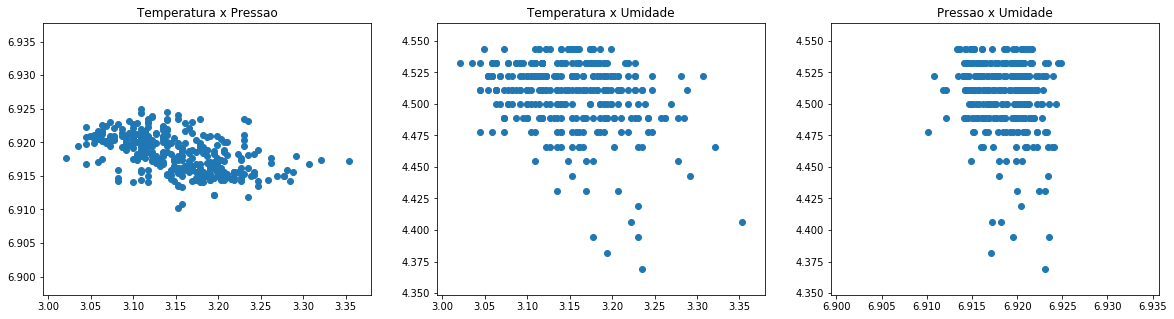

In [61]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 5) 
axs[0].scatter(temperatura1_log,pressao1_log);
axs[0].set_title('Temperatura x Pressao');
axs[1].scatter(temperatura1_log,umidade1_log);
axs[1].set_title('Temperatura x Umidade');
axs[2].scatter(pressao1_log,umidade1_log);
axs[2].set_title('Pressao x Umidade');

##### Análise sem log

In [62]:
dados_com_chuva = dados5[dados5['precipitacao']>0]
dados_com_chuva.head()

,time,temp_inst,pressao,umid_inst,precipitacao,vento_vel,horas,dias,hora seno,hora cosseno,dia seno,dia cosseno
25,2018-11-07 01:00:00,23.6,1008.7,88,3,13,1,1.0,0.258819,0.965926,0.017202,0.999852
26,2018-11-07 02:00:00,23.8,1008.6,90,0.2,57,2,1.0,0.500000,0.866025,0.017202,0.999852
34,2018-11-07 10:00:00,27.4,1008.2,69,0.2,81,10,1.0,0.500000,-0.866025,0.017202,0.999852
49,2018-11-08 01:00:00,24.1,1009.1,85,0.2,116,1,2.0,0.258819,0.965926,0.034398,0.999408
50,2018-11-08 02:00:00,22.9,1008.8,89,4.6,129,2,2.0,0.500000,0.866025,0.034398,0.999408


In [63]:
tempo1 = dados_com_chuva['time']
temperatura1 = dados_com_chuva['temp_inst']
pressao1 = dados_com_chuva['pressao']
umidade1 = dados_com_chuva['umid_inst']
precipitacao1 = dados_com_chuva['precipitacao']

temperatura1 = temperatura1.astype(float)
umidade1 = umidade1.astype(float)
pressao1 = pressao1.astype(float)
precipitacao1 = precipitacao1.astype(float)

temperatura1_log = temperatura1_log.astype(float)
umidade1_log = umidade1_log.astype(float)
pressao1_log = pressao1_log.astype(float)
precipitacao1_log = precipitacao1_log.astype(float)

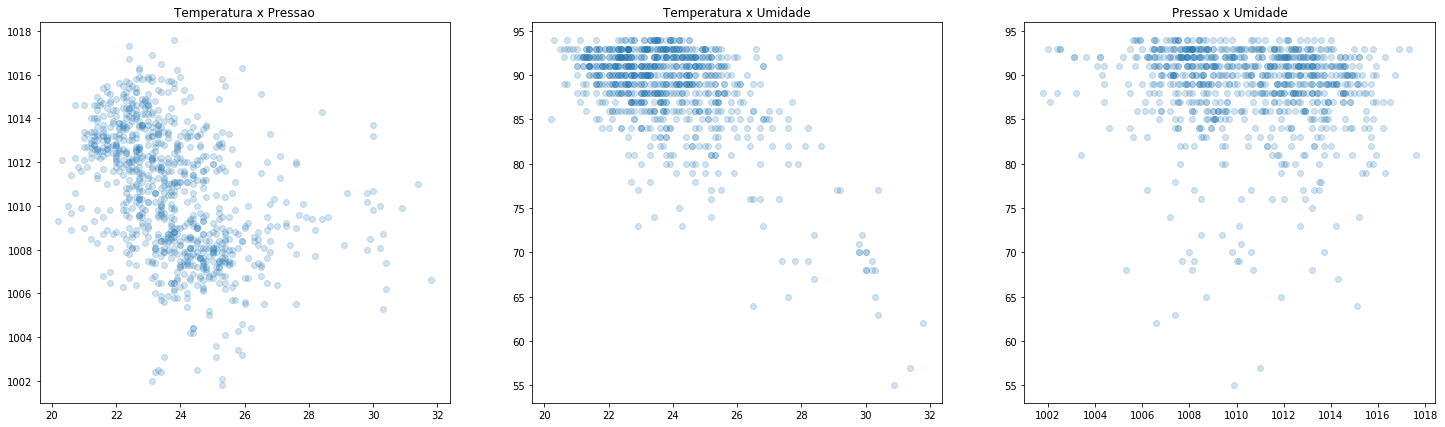

In [64]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25, 7) 
axs[0].scatter(temperatura1,pressao1, alpha=0.2);
axs[0].set_title('Temperatura x Pressao');
axs[1].scatter(temperatura1,umidade1, alpha=0.2);
axs[1].set_title('Temperatura x Umidade');
axs[2].scatter(pressao1,umidade1, alpha=0.2);
axs[2].set_title('Pressao x Umidade');

#### Correlação entre as variáveis independentes

In [65]:
print('Correlação entre temperatura e pressão:', temperatura1.corr(pressao1))
print('Correlação entre temperatura e umidade:', temperatura1.corr(umidade1))
print('Correlação entre pressão e umidade:',pressao1.corr(umidade1))

Correlação entre temperatura e pressão: -0.4076880756078039
Correlação entre temperatura e umidade: -0.5950262535123808
Correlação entre pressão e umidade: -0.10983952939618115


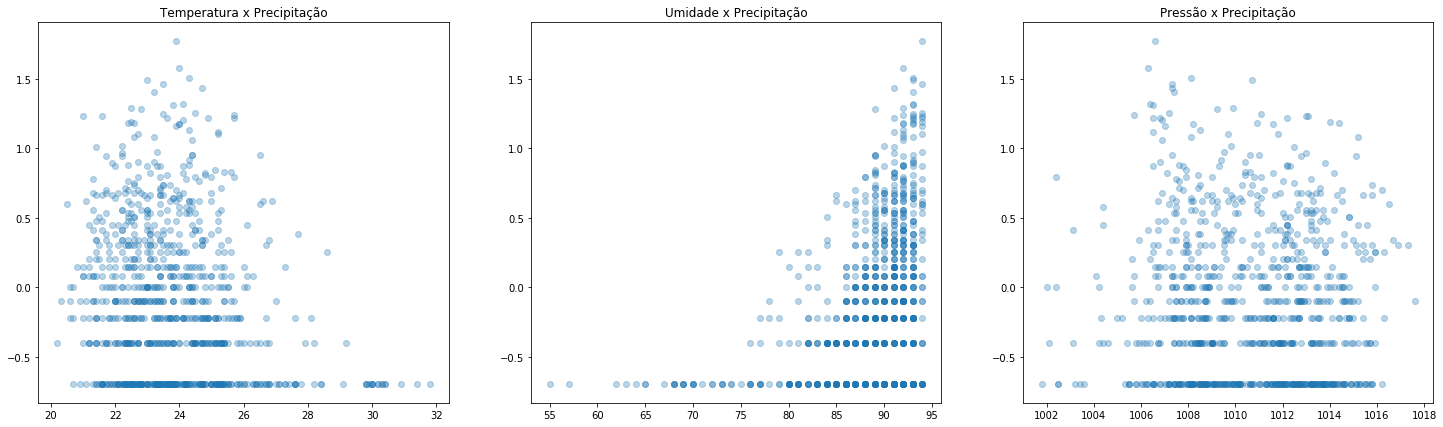

In [66]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(25, 7) 
axs[0].scatter(temperatura1,np.log10(precipitacao1), alpha=0.3);
axs[0].set_title('Temperatura x Precipitação');
axs[1].scatter(umidade1,np.log10(precipitacao1), alpha=0.3);
axs[1].set_title('Umidade x Precipitação');
axs[2].scatter(pressao1,np.log10(precipitacao1), alpha=0.3);
axs[2].set_title('Pressão x Precipitação');

#### Correlação entre as variáveis independentes e a variável dependente

In [67]:
print('Correlação entre temperatura e pressão:', np.log10(precipitacao1).corr(pressao1))
print('Correlação entre temperatura e umidade:', np.log10(precipitacao1).corr(umidade1))
print('Correlação entre pressão e umidade:',np.log10(precipitacao1).corr(temperatura1))

Correlação entre temperatura e pressão: -0.03963987120695976
Correlação entre temperatura e umidade: 0.4059043809724464
Correlação entre pressão e umidade: -0.19685016544813258


In [68]:
model = sm.OLS(np.log10(precipitacao1),sm.add_constant(umidade1))
results = model.fit()
results.summary()

E:\Programas\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           precipitacao   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     170.2
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           1.22e-35
Time:                        18:22:13   Log-Likelihood:                -633.16
No. Observations:                 865   AIC:                             1270.
Df Residuals:                     863   BIC:                             1280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8165      0.287    -13.306      0.000      -4.379      -3.254
umid_inst      0.0422      0.003     13.047      0.000       0.036       0.049
==============================================================================
Omnibus:                       29.729   Durbin-Watson:                   1.627
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.529
Skew:                           0.417   Prob(JB):                     3.87e-07
Kurtosis:                       2.647   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
model = sm.OLS(precipitacao1,sm.add_constant(umidade1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           precipitacao   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     52.74
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           8.49e-13
Time:                        18:22:14   Log-Likelihood:                -2471.4
No. Observations:                 865   AIC:                             4947.
Df Residuals:                     863   BIC:                             4956.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.3015      2.402     -6.371      0.000     -20.016     -10.587
umid_inst      0.1967      0.027      7.262      0.000       0.144       0.250
==============================================================================
Omnibus:                     1013.997   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99475.571
Skew:                           5.785   Prob(JB):                         0.00
Kurtosis:                      54.246   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
model = sm.OLS(precipitacao1,sm.add_constant(temperatura1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           precipitacao   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.440
Date:                Tue, 12 Nov 2019   Prob (F-statistic):             0.0640
Time:                        18:22:14   Log-Likelihood:                -2495.4
No. Observations:                 865   AIC:                             4995.
Df Residuals:                     863   BIC:                             5004.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7746      1.981      2.915      0.004       1.887       9.663
temp_inst     -0.1542      0.083     -1.855      0.064      -0.317       0.009
==============================================================================
Omnibus:                     1016.266   Durbin-Watson:                   1.473
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96316.032
Skew:                           5.826   Prob(JB):                         0.00
Kurtosis:                      53.364   Cond. No.                         321.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

E:\Programas\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


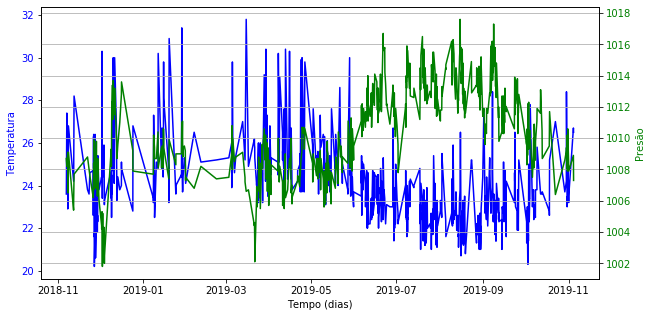

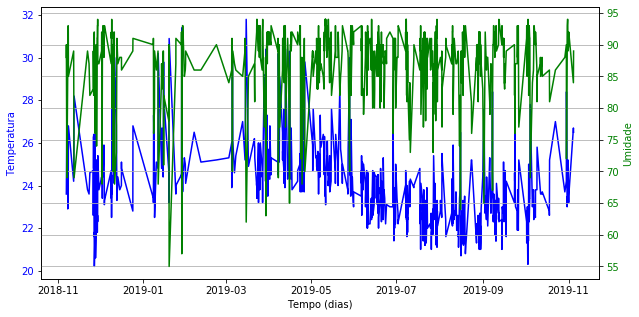

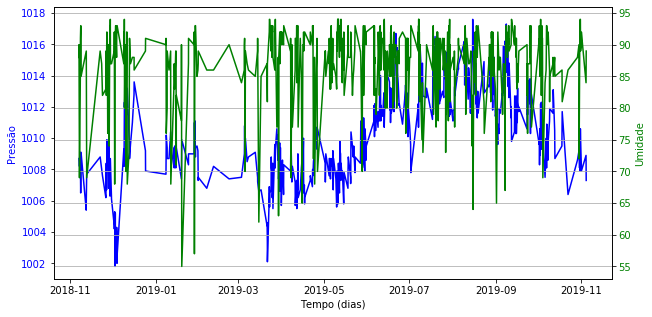

In [71]:
Grafico2Eixos(tempo1, 'Tempo (dias)', temperatura1,'Temperatura', pressao1, 'Presão')
Grafico2Eixos(tempo1, 'Tempo (dias)', temperatura1,'Temperatura', umidade1, 'Umidade')
Grafico2Eixos(tempo1, 'Tempo (dias)', pressao1,'Pressão', umidade1, 'Umidade')

___
## Analisando os dias que não tiveram chuvas

##### Análise com log

In [72]:
dados_log_sem_chuva = dados_log[dados_log['precipitacao']==0]
dados_log_sem_chuva.head()

,temp_inst,pressao,umid_inst,precipitacao,vento_vel
time,,,,,
2018-11-22 05:00:00,3.169686,6.916517,4.488636,0.0,4.700480
2018-11-26 22:00:00,3.072693,6.916418,4.521789,0.0,4.330733
2018-11-26 23:00:00,3.077312,6.916616,4.521789,0.0,5.170484
2018-11-27 22:00:00,3.025291,6.916616,4.488636,0.0,3.784190
2018-12-02 08:00:00,3.190476,6.911946,4.521789,0.0,3.583519


In [73]:
temperatura2_log = dados_log_com_chuva['temp_inst']
pressao2_log = dados_log_com_chuva['pressao']
umidade2_log = dados_log_com_chuva['umid_inst']
precipitacao2_log = dados_log_com_chuva['precipitacao']

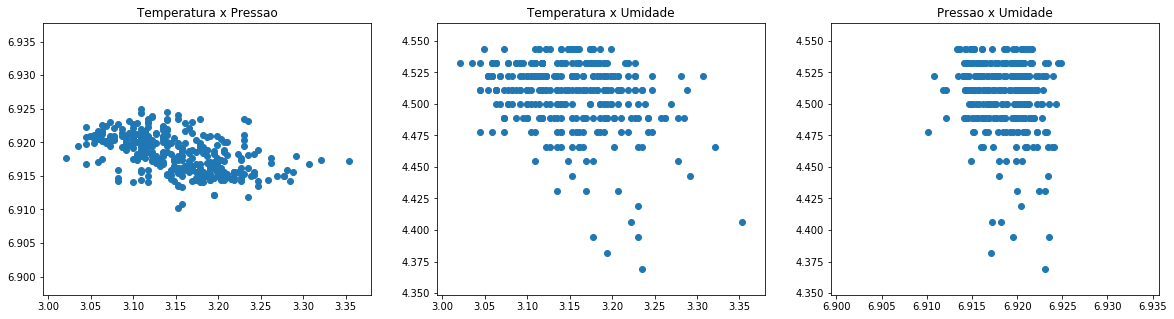

In [74]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 5) 
axs[0].scatter(temperatura2_log,pressao2_log);
axs[0].set_title('Temperatura x Pressao');
axs[1].scatter(temperatura2_log,umidade2_log);
axs[1].set_title('Temperatura x Umidade');
axs[2].scatter(pressao2_log,umidade2_log);
axs[2].set_title('Pressao x Umidade');

##### Análise sem log

In [75]:
dados_sem_chuva = dados5[dados5['precipitacao']==0]
dados_sem_chuva.head()

,time,temp_inst,pressao,umid_inst,precipitacao,vento_vel,horas,dias,hora seno,hora cosseno,dia seno,dia cosseno
0,2018-11-06 00:00:00,25.3,1008.1,76,0,74,0,0.0,0.000000,1.000000,0.0,1.0
1,2018-11-06 01:00:00,25.2,1008.1,78,0,69,1,0.0,0.258819,0.965926,0.0,1.0
2,2018-11-06 02:00:00,25.1,1007.6,78,0,90,2,0.0,0.500000,0.866025,0.0,1.0
3,2018-11-06 03:00:00,25.2,1007.1,79,0,95,3,0.0,0.707107,0.707107,0.0,1.0
4,2018-11-06 04:00:00,24.7,1006.7,77,0,58,4,0.0,0.866025,0.500000,0.0,1.0


In [76]:
tempo2 = dados_sem_chuva['time']
temperatura2 = dados_sem_chuva['temp_inst']
pressao2 = dados_sem_chuva['pressao']
umidade2 = dados_sem_chuva['umid_inst']
precipitacao2 = dados_sem_chuva['precipitacao']

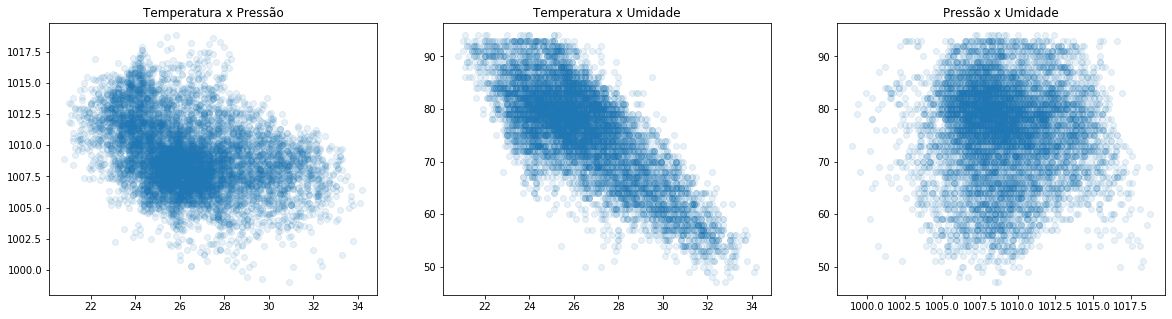

In [77]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(20, 5) 
axs[0].scatter(temperatura2,pressao2, alpha=0.1);
axs[0].set_title('Temperatura x Pressão');
axs[1].scatter(temperatura2,umidade2, alpha=0.1);
axs[1].set_title('Temperatura x Umidade');
axs[2].scatter(pressao2,umidade2, alpha=0.1);
axs[2].set_title('Pressão x Umidade');

***Valores de correlação entre as variáveis***

In [78]:
temperatura2 = temperatura2.astype(float)
umidade2 = umidade2.astype(float)
pressao2 = pressao2.astype(float)
print('Correlação entre temperatura e pressão:', temperatura2.corr(pressao2))
print('Correlação entre temperatura e umidade:', temperatura2.corr(umidade2))
print('Correlação entre pressão e umidade:',pressao2.corr(umidade2))

Correlação entre temperatura e pressão: -0.37013423515633453
Correlação entre temperatura e umidade: -0.7607690347330321
Correlação entre pressão e umidade: -0.023401373426295346


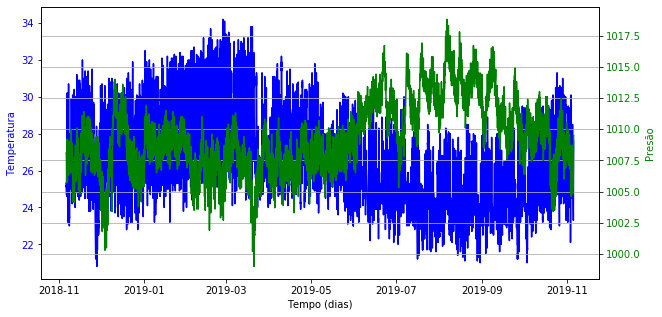

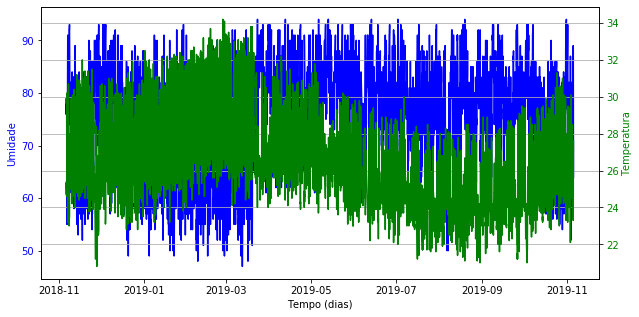

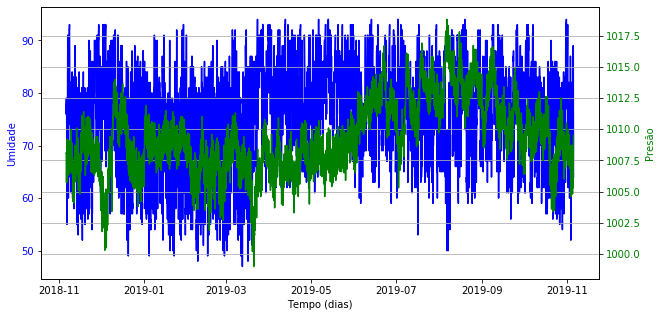

In [79]:
Grafico2Eixos(tempo2, 'Tempo (dias)', temperatura2,'Temperatura', pressao2, 'Presão')
Grafico2Eixos(tempo2, 'Tempo (dias)', umidade2, 'Umidade', temperatura2,'Temperatura')
Grafico2Eixos(tempo2, 'Tempo (dias)',umidade2, 'Umidade',pressao2, 'Presão')

In [80]:
### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [81]:
Y = dados_log_com_chuva['precipitacao'].astype(float)

In [82]:
X3 = dados_log_com_chuva[['temp_inst', 'pressao', 'umid_inst']].astype(float)

results3 = regress(X3, Y)
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           precipitacao   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     12.87
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           5.75e-08
Time:                        18:22:28   Log-Likelihood:                -382.43
No. Observations:                 331   AIC:                             772.9
Df Residuals:                     327   BIC:                             788.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.8033    136.232     -0.211      0.833    -296.805     239.198
temp_inst      2.0694      0.955      2.168      0.031       0.191       3.947
pressao       -2.8081     18.923     -0.148      0.882     -40.034      34.418
umid_inst      9.5125      1.736      5.481      0.000       6.098      12.927
==============================================================================
Omnibus:                       18.729   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.928
Skew:                           0.614   Prob(JB):                     2.85e-05
Kurtosis:                       2.911   Cond. No.                     2.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""